<a href="https://colab.research.google.com/github/sylvia830/Real_Estate_Prices_Prediction/blob/main/Real_Estate_Prices_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

In [8]:
#import dataset
dataset = pd.read_csv('Real estate.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values

In [3]:
dataset.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
#give a brief summary of the dataset
dataset.info(null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   No                                      int64  
 1   X1 transaction date                     float64
 2   X2 house age                            float64
 3   X3 distance to the nearest MRT station  float64
 4   X4 number of convenience stores         int64  
 5   X5 latitude                             float64
 6   X6 longitude                            float64
 7   Y house price of unit area              float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [9]:
dataset.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


**Data Visualization**

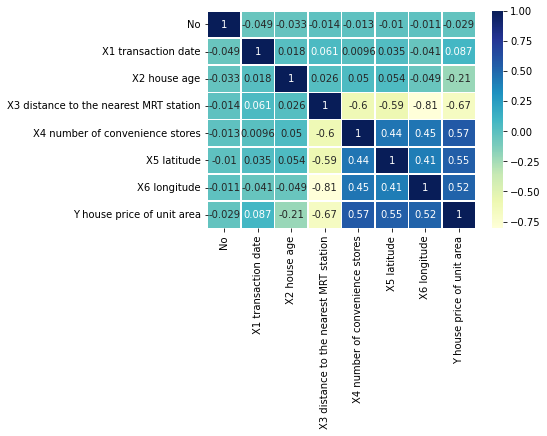

In [10]:
#heatmap to illustrate the correlation amomg the variables
sns.heatmap(dataset.corr(), annot= True, cmap="YlGnBu", linewidths=.5)

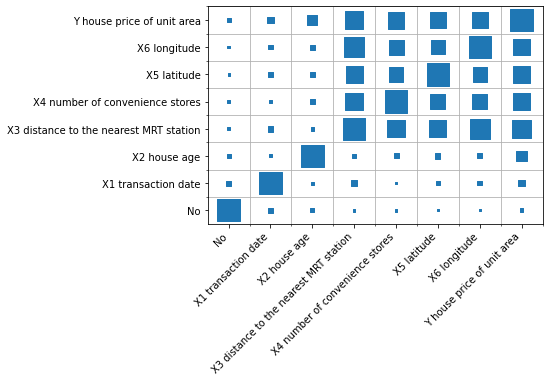

In [22]:
#alternative version of the heatmap
def heatmap(x,y,size):
  fig, ax = plt.subplots()
   # Mapping from column names to integer coordinates
  x_labels = [v for v in sorted(x.unique())]
  y_labels = [v for v in sorted(y.unique())]
  x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
  y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
  size_scale = 500
  ax.scatter(
      x=x.map(x_to_num), # Use mapping for x
      y=y.map(y_to_num), # Use mapping for y
      s=size * size_scale, # Vector of square sizes, proportional to size parameter
      marker='s' # Use square as scatterplot marker
    )

    
  # Show column labels on the axes
  ax.set_xticks([x_to_num[v] for v in x_labels])
  ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
  ax.set_yticks([y_to_num[v] for v in y_labels])
  ax.set_yticklabels(y_labels)

  ax.grid(False, 'major')
  ax.grid(True, 'minor')
  ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
  ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

  ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
  ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])

     
data = pd.read_csv('Real estate.csv')
columns = ['No', 'X1 transaction date', 'X2 house age', 
           'X3 distance to the nearest MRT station', 
           'X4 number of convenience stores', 'X5 latitude','X6 longitude',
           'Y house price of unit area'] 
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)


In [ ]:
#split the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
#convert the scientific notation to float notation
float_formatter = "{:.7f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})
print(X_test)

**Using Polynomial Regression model to predict the prices:**

In [ ]:
#train the polynomial model on the training set 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg =PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)

In [ ]:
#predict test results
y_pred = lin_reg.predict(poly_reg.fit_transform(X_test))
print(y_pred)

In [ ]:
#compare predicted results with y_test
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)), 1))

In [ ]:
#evaluate the model performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7934773157035822

In [ ]:
#train the polynomial regression model on the training set with a degree of 7
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg1 = PolynomialFeatures(degree=7)
x_poly1 = poly_reg1.fit_transform(X)
lin_reg1 = LinearRegression()
lin_reg1.fit(x_poly1, y)

In [ ]:
#predict the results for new degree
y_pred_new = lin_reg1.predict(poly_reg1.fit_transform(X_test))
print(y_pred_new)

In [ ]:
#compare the new results with y_test
print(np.concatenate((y_pred_new.reshape(len(y_pred_new),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
#evalute the model performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_new)

0.9916092070641795

**Using Multiple Linear Regression model to predict prices**

In [ ]:
#train Multiple Linear Regression model on the training set 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
#predict test results
y_pred_lin = regressor.predict(X_test)
print(y_pred_lin)

In [ ]:
#compare the predictions with y_test
print(np.concatenate((y_pred_lin.reshape(len(y_pred_lin),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
#evalute the model performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lin)

0.7061990777414744